<a href="https://colab.research.google.com/github/Darius-BOUL/Car_prices/blob/main/Car_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Comprendre le marché des revendeur automobile aux USA.
Ce jeu de données vient au format CSV.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/car_prices.csv")

La question est de savoir quel marque de véhicules a été la plus vendue en 2015 ?

On débute par nettoyer les données, si nécessaire.

On commence par inspecter les premières lignes et les valeurs manquantes :

In [3]:
df.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [5]:
df.isnull().sum()

,0
year,0
make,10301
model,10399
trim,10651
body,13195
transmission,65352
vin,4
state,0
condition,11820
odometer,94


Si nécessaire, on traite les valeurs manquantes en fonction de leur importance

In [6]:
df_clean = df.dropna()

In [7]:
df_clean.isnull().sum()

,0
year,0
make,0
model,0
trim,0
body,0
transmission,0
vin,0
state,0
condition,0
odometer,0


Filtrer les ventes de 2015

In [8]:
df_2015 = df[df["year"] == 2015]
df_2015.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
11,2015,Kia,Optima,LX,Sedan,automatic,5xxgm4a73fg353538,ca,48.0,2034.0,red,tan,kia motors finance,15150.0,17700.0,Tue Dec 16 2014 12:00:00 GMT-0800 (PST)


Identifiant de la marque la plus vendue

In [9]:
marque_plus_vendue = df_2015["make"].value_counts().idxmax()
count = df_2015["make"].value_counts().max()

print(f"Avec {count} ventes, la {marque_plus_vendue} est la marque la plus vendue en 2015")


Avec 1482 ventes, la Kia est la marque la plus vendue en 2015


Visualiser les ventes par marque.

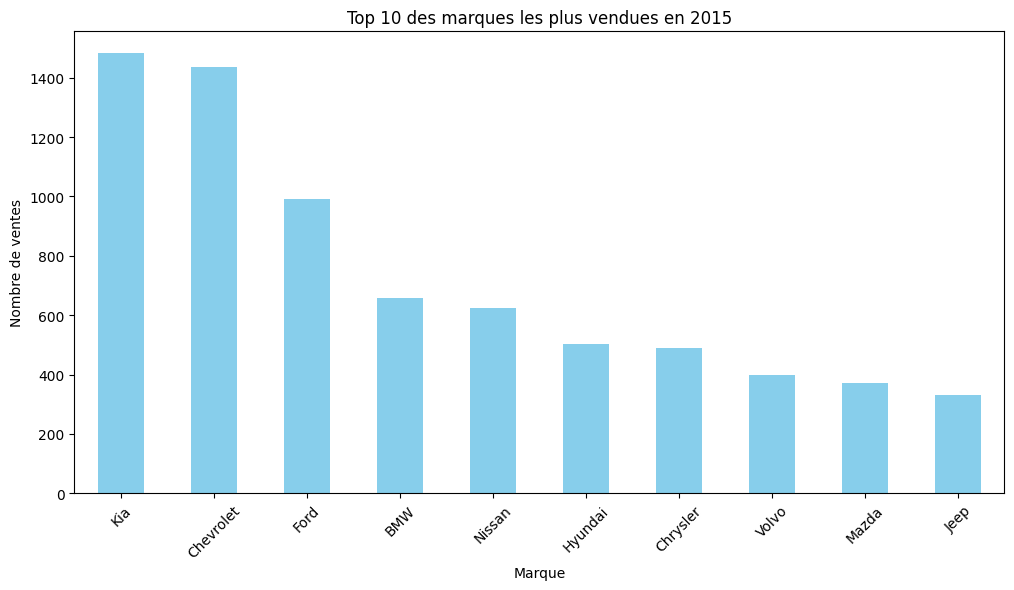

In [10]:
# Top 10 des marques les plus vendues
top_makes = df_2015["make"].value_counts().head(10)

plt.figure(figsize=(12,6))
top_makes.plot(kind="bar", color="skyblue")
plt.xlabel("Marque")
plt.ylabel("Nombre de ventes")
plt.title("Top 10 des marques les plus vendues en 2015")
plt.xticks(rotation=45)
plt.show()
